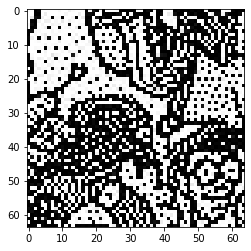

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm

directory = "C:/Users/Jacky Gnong/Desktop/Hey-Waldo/64-gray"

categories = ['waldo', 'notwaldo']

for category in categories:  # our catagories are waldo and not waldo
    path = os.path.join(directory,category)  # create path to waldo and not waldo
    for img in os.listdir(path):  # iterate over each images
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)  # convert to array
        plt.imshow(img_array, cmap='gray')  # graph it
        plt.show()  # display!

        break  # we just want one for now so break
    break  #...and one more!

In [2]:
print(img_array)

[[249 253   0 ...   0   2   2]
 [255 255   0 ...   0   7 253]
 [254 235  14 ...   0 255 253]
 ...
 [  5   4 255 ...   1   3 255]
 [255   0   0 ...   0 242   7]
 [  1   0   3 ...   0   7 250]]


In [3]:
print(img_array.shape)

(64, 64)


In [4]:
training_data = []

def create_training_data():
    for category in categories:  

        path = os.path.join(directory,category)  # create path to dogs and cats
        class_num = categories.index(category)  # get the classification  (0 or a 1). 0 = waldo 1 = notwaldo

        for img in tqdm(os.listdir(path)):  # iterate over each image
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                training_data.append([img_array, class_num])  # add this to our training_data
            except Exception as e:
                pass


create_training_data()

print(len(training_data))

100%|██████████| 5338/5338 [00:46<00:00, 115.41it/s]

5376


In [5]:
import random

random.shuffle(training_data)

# for sample in training_data[:10]:
#     print(sample[1])

In [6]:
X = []
y = []

size = 64

for features,label in training_data:
    X.append(features)
    y.append(label)

print(X[0].reshape(-1, size, size, 1))

X = np.array(X).reshape(-1, size, size, 1)
y = np.array(y)

[[[[  0]
   [  2]
   [ 11]
   ...
   [245]
   [  7]
   [250]]

  [[ 11]
   [254]
   [  0]
   ...
   [254]
   [  2]
   [255]]

  [[  0]
   [  5]
   [  0]
   ...
   [  0]
   [255]
   [  0]]

  ...

  [[255]
   [  9]
   [255]
   ...
   [  3]
   [  5]
   [242]]

  [[255]
   [239]
   [255]
   ...
   [255]
   [  0]
   [255]]

  [[255]
   [  0]
   [249]
   ...
   [  0]
   [255]
   [253]]]]


In [7]:
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

In [11]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

import pickle

pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

X = X/255.0

class_weight = {0: 38.,
                1: 5338.}

model = Sequential()

model.add(Conv2D(256, (3, 3), input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

model.add(Dense(64))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

hist = model.fit(X, y, batch_size=32, epochs=3, validation_split=0.3, class_weight=class_weight)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train on 3763 samples, validate on 1613 samples
Epoch 1/3
3763/3763 [==============================] - 112s 30ms/sample - loss: 488.2335 - accuracy: 0.9729 - val_loss: 128.8562 - val_accuracy: 0.9944
Epoch 2/3
3763/3763 [==============================] - 114s 30ms/sample - loss: 485.2392 - accuracy: 0.9923 - val_loss: 269.1472 - val_accuracy: 0.9944
Epoch 3/3
3763/3763 [==============================] - 109s 29ms/sample - loss: 259.9054 - accuracy: 0.9923 - val_loss: 114.5602 - val_accuracy: 0.9944


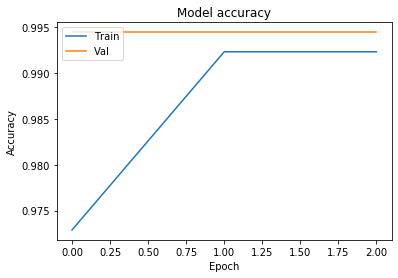

In [12]:
#Visualize the models accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

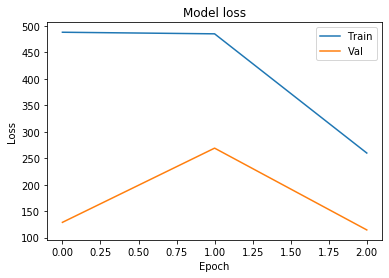

In [13]:
#Visualize the models loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()